# **TRABALHO 3** MapReduce

* Antonia Raiane Santos Araujo Cruz
* Jerry Macedo

### **Contextualização**

* Link dos datasets: https://drive.google.com/drive/mobile/folders/0BzwVBj1heLoReXVLaU51bTAxZ2M?usp=sharing
* Link do vídeo:
* Link do relatório:

### Instalando as dependências

O PySpark está incluído nas versões oficiais do Spark disponíveis no site do Apache Spark

In [219]:
!pip install pyspark

In [160]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"   

In [462]:
from pyspark.sql import SparkSession
from pyspark.sql.types import * 
from pyspark.sql.functions import *
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, udf, to_timestamp, hour,from_utc_timestamp, regexp_extract
from pyspark.sql.functions import to_timestamp
import matplotlib.pyplot as plt


In [360]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master('local[*]') \
    .appName("TrabalhoMapReduce") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

In [361]:
spark

In [362]:
get_ipython().system_raw('./ngrok authtoken 2IdsLU5nGafRfq650p5MAO8GJ1D_7qUYgZtkBw8QLPF25JaF4')
get_ipython().system_raw('./ngrok http 4042 &')

In [363]:
!curl -s http://localhost:4042/api/tunnels

## **Questões**

### Questão2) Dado um dataset com tweets relacionados à campanha eleitoral presidencial de 2014, responda:

Descrição:
- debate-tweets.tsv: http://lia.ufc.br/~igobrilhante/twitter-home/
- eiffel-tower-reviews.json: Cada linha é um son com representação do review

In [364]:
schemaDfDebate = StructType() \
      .add("id",LongType(),True) \
      .add("content",StringType(),True) \
      .add("coordinate_0",StringType(),True) \
      .add("coordiante_1",StringType(),True) \
      .add("retweeted",StringType(),True) \
      .add("tweet_id",StringType(),True) \
      .add("tweet_id_str",StringType(),True) \
      .add("created_at",StringType(),True) \
      .add("created_at_str",StringType(),True) \
      .add("in_reply_to_user_id",StringType(),True) \
      .add("lang",StringType(),True) \
      .add("place_name",StringType(),True) \
      .add("place_id",StringType(),True) \
      .add("place_bb_00",StringType(),True) \
      .add("place_bb_01",StringType(),True) \
      .add("place_bb_10",StringType(),True) \
      .add("place_bb_11",StringType(),True) \
      .add("place_bb_20",StringType(),True) \
      .add("place_bb_21",StringType(),True) \
      .add("place_bb_30",StringType(),True) \
      .add("place_bb_31",StringType(),True) \
      .add("place_type",StringType(),True) \
      .add("place_country_code",StringType(),True) \
      .add("place_country",StringType(),True) \
      .add("place_full_name",StringType(),True) \
      .add("user_name",StringType(),True) \
      .add("user_id",StringType(),True) \
      .add("user_id_str",StringType(),True) \
      .add("user_location",StringType(),True) \
      .add("user_friend_count",StringType(),True) \
      .add("user_created_at",StringType(),True) \
      .add("user_screen_name",StringType(),True) 


In [365]:
dfDebate = spark.read.csv("debate-tweets.tsv",sep=r'\t',schema=schemaDfDebate)
dfDebate.printSchema()

root
 |-- id: long (nullable = true)
 |-- content: string (nullable = true)
 |-- coordinate_0: string (nullable = true)
 |-- coordiante_1: string (nullable = true)
 |-- retweeted: string (nullable = true)
 |-- tweet_id: string (nullable = true)
 |-- tweet_id_str: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- created_at_str: string (nullable = true)
 |-- in_reply_to_user_id: string (nullable = true)
 |-- lang: string (nullable = true)
 |-- place_name: string (nullable = true)
 |-- place_id: string (nullable = true)
 |-- place_bb_00: string (nullable = true)
 |-- place_bb_01: string (nullable = true)
 |-- place_bb_10: string (nullable = true)
 |-- place_bb_11: string (nullable = true)
 |-- place_bb_20: string (nullable = true)
 |-- place_bb_21: string (nullable = true)
 |-- place_bb_30: string (nullable = true)
 |-- place_bb_31: string (nullable = true)
 |-- place_type: string (nullable = true)
 |-- place_country_code: string (nullable = true)
 |-- place_country

In [323]:
dfDebate

DataFrame[id: bigint, content: string, coordinate_0: string, coordiante_1: string, retweeted: string, tweet_id: string, tweet_id_str: string, created_at: string, created_at_str: string, in_reply_to_user_id: string, lang: string, place_name: string, place_id: string, place_bb_00: string, place_bb_01: string, place_bb_10: string, place_bb_11: string, place_bb_20: string, place_bb_21: string, place_bb_30: string, place_bb_31: string, place_type: string, place_country_code: string, place_country: string, place_full_name: string, user_name: string, user_id: string, user_id_str: string, user_location: string, user_friend_count: string, user_created_at: string, user_screen_name: string]

In [283]:
type(dfDebate)

pyspark.sql.dataframe.DataFrame

In [284]:
(dfDebate.count(), len(dfDebate.columns))

(7228127, 32)

In [285]:
dfDebate.take(2)

[Row(id=522394422710136832, content='@anacddd verdade, olha o site', coordinate_0='-27.516566', coordiante_1='-48.646082', retweeted='False', tweet_id='522394422710136832', tweet_id_str='522394422710136832', created_at='Wed Oct 15 14:31:50 +0000 2014', created_at_str='2014-10-15', in_reply_to_user_id='303425830', lang='pt', place_name='Biguaçu', place_id='77c15e08a456c529', place_bb_00='0.0', place_bb_01='0.0', place_bb_10='0.0', place_bb_11='0.0', place_bb_20='0.0', place_bb_21='0.0', place_bb_30='0.0', place_bb_31='0.0', place_type=None, place_country_code=None, place_country=None, place_full_name=None, user_name='Geovana Nunes', user_id='295414968', user_id_str='295414968', user_location=None, user_friend_count='316', user_created_at='Mon May 09 00:12:02 +0000 2011', user_screen_name='geovanannunes'),
 Row(id=522394422806581248, content='Que ñ*', coordinate_0='-27.768328', coordiante_1='-51.668323', retweeted='False', tweet_id='522394422806581248', tweet_id_str='522394422806581248',

In [286]:
dfDebate.limit(10).toPandas()

,id,content,coordinate_0,coordiante_1,retweeted,tweet_id,tweet_id_str,created_at,created_at_str,in_reply_to_user_id,...,place_country_code,place_country,place_full_name,user_name,user_id,user_id_str,user_location,user_friend_count,user_created_at,user_screen_name
0,522394422710136832,"@anacddd verdade, olha o site",-27.516566,-48.646082,False,522394422710136832,522394422710136832,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,303425830,...,None,None,None,Geovana Nunes,295414968,295414968,None,316,Mon May 09 00:12:02 +0000 2011,geovanannunes
1,522394422806581248,Que ñ*,-27.768328,-51.668323,False,522394422806581248,522394422806581248,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Rosane Fernandes,2409363642,2409363642,Cacique Doble RS,47,Mon Mar 24 18:06:40 +0000 2014,Rosane_fsf
2,522394422731100160,Vou quebrar a Bruna,-27.00464,-48.623519,False,522394422731100160,522394422731100160,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Bebel,162447082,162447082,None,513,Sat Jul 03 18:03:35 +0000 2010,_isarenata
3,522394422810783745,agora vou p segundo andar e depois p 3° 👏,-15.852082,-47.961413,False,522394422810783745,522394422810783745,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,tatá,387694391,387694391,None,347,Sun Oct 09 14:19:52 +0000 2011,thayflausino
4,522394423137943553,Me sinto tão bem - Mika #QueroNoTVZ,-3.755046,-38.566769,False,522394423137943553,522394423137943553,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Simone ♥ DDM's ♥,152792963,152792963,Fortaleza/Ceará,719,Sun Jun 06 22:15:22 +0000 2010,simoneesilva
5,522394423188271104,"Eu estou aqui, deixando a vida me guiar, não é...",-22.846869,-43.30883,False,522394423188271104,522394423188271104,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Gar6,749780077,749780077,Rio de Janeiro,356,Fri Aug 10 17:56:10 +0000 2012,juliagar6
6,522394423238606848,Quando vai embora tudo fica sem graça,-22.904301,-43.544403,False,522394423238606848,522394423238606848,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Isa,2476253858,2476253858,None,164,Sun May 04 02:22:02 +0000 2014,isabelleecorrea
7,522394423528022016,@paynecaralhudo kkkkkk n n sou legal kkk,-23.509058,-46.96892,False,522394423528022016,522394423528022016,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,518826601,...,None,None,None,Júlio Lessa ✌,324937648,324937648,None,943,Mon Jun 27 13:28:08 +0000 2011,SiempreCtgLS
8,522394423632875521,Conceição da Barra acho que vou pra outro dia,-18.713338,-40.405779,False,522394423632875521,522394423632875521,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,♔Lu♔,536501962,536501962,Nova Venécia-Es,82,Sun Mar 25 17:45:22 +0000 2012,Hey_Marrenta
9,522394424010362881,@Maniavato te amo ♥,-23.064705,-45.717173,False,522394424010362881,522394424010362881,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,542665678,...,None,None,None,queen,1414028317,1414028317,| no puteiro com a Ju. |,1911,Wed May 08 22:50:20 +0000 2013,ButeraCertified


In [324]:
dfDebate.select(dfDebate['user_created_at'], dfDebate['created_at']).show(5,truncate=False)

+------------------------------+------------------------------+
|user_created_at               |created_at                    |
+------------------------------+------------------------------+
|Mon May 09 00:12:02 +0000 2011|Wed Oct 15 14:31:50 +0000 2014|
|Mon Mar 24 18:06:40 +0000 2014|Wed Oct 15 14:31:50 +0000 2014|
|Sat Jul 03 18:03:35 +0000 2010|Wed Oct 15 14:31:50 +0000 2014|
|Sun Oct 09 14:19:52 +0000 2011|Wed Oct 15 14:31:50 +0000 2014|
|Sun Jun 06 22:15:22 +0000 2010|Wed Oct 15 14:31:50 +0000 2014|
+------------------------------+------------------------------+
only showing top 5 rows



In [366]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
dfDebateDate=dfDebate.withColumn("date",to_timestamp('created_at', 'EEE LLL d HH:mm:ss z yyyy'))
dfDebateFiltro=dfDebateDate.select('content','created_at',"date")

In [389]:
dfHashtag=dfDebateFiltro.filter(dfDebateFiltro["content"].rlike("^#\w+|\s#\w+")).withColumn("hashtag",regexp_extract("content","^#\w+|\s#\w+",0))\
.withColumn("hora",hour("date"))
dfHashtag.show(5)

+--------------------+--------------------+-------------------+--------------------+----+
|             content|          created_at|               date|             hashtag|hora|
+--------------------+--------------------+-------------------+--------------------+----+
|Me sinto tão bem ...|Wed Oct 15 14:31:...|2014-10-15 11:31:50|         #QueroNoTVZ|  11|
|#EMABiggestFansJu...|Wed Oct 15 14:31:...|2014-10-15 11:31:50|#EMABiggestFansJu...|  11|
|Dr. Bieber #EMABi...|Wed Oct 15 14:31:...|2014-10-15 11:31:51| #EMABiggestFansJ...|  11|
|MIDNIGHT MEMORIES...|Wed Oct 15 14:31:...|2014-10-15 11:31:51|   #EMABiggestFans1D|  11|
|#EMABiggestFans1D...|Wed Oct 15 14:31:...|2014-10-15 11:31:52|   #EMABiggestFans1D|  11|
+--------------------+--------------------+-------------------+--------------------+----+
only showing top 5 rows



### a) Quais foram as hashtags mais usadas pela manhã, tarde e noite?

Inicialmente foi considerando um intervalo de tempo para cada turno. Considerando o período da manhã de 06h até as 12h, período da tarde de 12h as 18h e noite de 18h até as 6h da manhã.

In [397]:
dfHashtag_manha=dfHashtag.filter((dfHashtag["hora"]>=6) & (dfHashtag["hora"]<12));
dfHashtag_manha.count()

118999

Desta forma, no período da manhã nota-se que foram twets com 118999 hashtags, sendo que desse valor optamos por apresentar apenas as 10 hashtags mais usadas. Conforme abaixo:

In [391]:
print("Top 10 das hastags mais usadas pela manhã:")
dfHashtag_manha.groupby("hashtag", "hora").count().sort('count', ascending=False).limit(10).show()

Top 10 das hastags mais usadas pela manhã:
+--------------------+-----+
|             hashtag|count|
+--------------------+-----+
|   #EMABiggestFans1D|27832|
| #EMABiggestFansJ...|23003|
|#EMABiggestFansJu...| 2674|
|   #EMABiggestFans1D| 2313|
|         #QueroNoTVZ| 2217|
|         #QueroNoTVZ| 1402|
| #VoteVampsTeenAw...|  976|
|       #AUSTINMAHONE|  694|
|       #AustinMahone|  620|
|             #trndnl|  482|
+--------------------+-----+



Em relação ao período da tarde, observamos que foram twetadas 267072 hashtags.

In [392]:
dfHashtag_tarde=dfHashtag.filter((dfHashtag["hora"]>=12) & (dfHashtag["hora"]<18));
dfHashtag_tarde.count()

267072

Abaixo apresentamos o top 10 hashtags usadas à tarde.

In [393]:
print("Top 10 das hastags mais usas pela tarde:")
dfHashtag_tarde.groupby("hashtag").count().sort('count', ascending=False).limit(10).show()

Top 10 das hastags mais usas pela tarde:
+--------------------+-----+
|             hashtag|count|
+--------------------+-----+
|   #EMABiggestFans1D|57515|
| #EMABiggestFansJ...|52163|
|#EMABiggestFansJu...| 6057|
|        #StealMyGirl| 5918|
|   #EMABiggestFans1D| 4812|
|   #bigpaynodanceoff| 3649|
| #LuanSantanaNaHo...| 2872|
|    #CartersNewVideo| 1679|
|     #FlyNoMixDiario| 1141|
|       #AustinMahone| 1040|
+--------------------+-----+



Enquanto que à noite tivemos um total de 487219 hashtags, cosniderando o filtro de horário das 18h as 06h. Logo em seguida visualizamos as 10 hashtgas mais twetadas.

In [394]:
dfHashtag_noite=dfHashtag.filter(dfHashtag["hora"]>=18).union(dfHashtag.filter(dfHashtag["hora"]<6));
dfHashtag_noite.count()

487219

In [398]:
print("Top 10 das hastags mais usas pela noite:")
dfHashtag_noite.groupby("hashtag").count().sort('count', ascending=False).limit(10).show()

Top 10 das hastags mais usas pela noite:
+--------------------+------+
|             hashtag| count|
+--------------------+------+
| #EMABiggestFansJ...|104327|
|   #EMABiggestFans1D|104241|
|#EMABiggestFansJu...| 14142|
|       #camilasayshi|  9024|
|   #EMABiggestFans1D|  8587|
|     #TheVoiceBrasil|  2315|
|        #DebateNoSBT|  2229|
|                  #E|  2037|
|        #AssistamODR|  1953|
|          #Vote5HEMA|  1952|
+--------------------+------+



### b) Quais as hashtags mais usadas em cada dia?

#Texto

In [410]:
dfHashtag_info_data=dfDebateDate.filter(dfDebateDate["content"].rlike("^#\w+|\s#\w+"))\
    .withColumn("minutos",F.minute("date"))\
    .withColumn("hora",F.hour("date"))\
    .withColumn("dia",F.dayofmonth("date"))\
    .withColumn("mês",F.month("date"))\
    .withColumn("hashtag",regexp_extract("content","^#\w+|\s#\w+",0)).select("dia","mês","hora", "minutos","hashtag", "content");
dfHashtag_info_data

DataFrame[dia: int, mês: int, hora: int, minutos: int, hashtag: string, content: string]

In [400]:
dfHashtag_info_data

DataFrame[dia: int, mês: int, hora: int, minutos: int, hashtag: string]

In [403]:
dfHashtag_dia_final=dfHashtag_info_data.groupby("dia","mês","hashtag").count().sort("count", ascending=False)
print("As hastags mais usadas por dia:")
dfHashtag_dia_final.toPandas()

As hastags mais usadas por dia:


,dia,mês,hashtag,count
0,16.0,10.0,#EMABiggestFans1D,58662
1,16.0,10.0,#EMABiggestFansJustinBieber,46097
2,15.0,10.0,#EMABiggestFans1D,43730
3,15.0,10.0,#EMABiggestFansJustinBieber,40738
4,17.0,10.0,#EMABiggestFans1D,32530
...,...,...,...,...
148127,20.0,10.0,#Tw10000,1
148128,20.0,10.0,#arisjerome,1
148129,20.0,10.0,#TeAmoooo,1
148130,20.0,10.0,#primogato,1


### c) Qual o número de tweets por hora a cada dia? 

In [416]:
dfHashtag_hora_final=dfHashtag_info_data.groupBy("dia","mês","hora","hashtag").count().sort("count", ascending=False)
print("As hastags mais usadas por hora a cada dia:")
dfHashtag_hora_final.toPandas()

As hastags mais usadas por hora a cada dia:


,dia,mês,hora,hashtag,count
0,15.0,10.0,22.0,#EMABiggestFansJustinBieber,8738
1,15.0,10.0,22.0,#camilasayshi,8513
2,15.0,10.0,23.0,#EMABiggestFans1D,6731
3,16.0,10.0,22.0,#EMABiggestFansJustinBieber,6504
4,15.0,10.0,22.0,#EMABiggestFans1D,5994
...,...,...,...,...,...
208921,20.0,10.0,2.0,#TeSigoEsperando,1
208922,20.0,10.0,3.0,#parei,1
208923,20.0,10.0,4.0,#muitoamorenvolvido,1
208924,20.0,10.0,4.0,#fui,1


In [412]:
dfHashtag_hora_final=dfHashtag_info_data.groupBy("dia","hora","content").count().sort("count", ascending=False)
print("As hastags mais usadas por hora a cada dia:")
dfHashtag_hora_final.toPandas()

As hastags mais usadas por hora a cada dia:


,dia,hora,content,count
0,15.0,22.0,#EMABiggestFansJustinBieber,112
1,15.0,23.0,MTV EMA | Vote - http://t.co/Ro4Y4aXn5A #EMABi...,100
2,16.0,0.0,MTV EMA | Vote - http://t.co/XUIMfCFG2L #EMABi...,93
3,16.0,22.0,#EMABiggestFansJustinBieber,63
4,15.0,23.0,#EMABiggestFansJustinBieber,57
...,...,...,...,...
848939,20.0,2.0,O povo da minha sala me odeia 😂 #EMABiggestFan...,1
848940,20.0,3.0,#brotherlylove #puggles and #george #puppies #...,1
848941,20.0,4.0,#Top3Apps for 'Luan e Letícia' Twitter for An...,1
848942,20.0,4.0,cento e noventa e dois #EMABiggestFansJustinBi...,1


### d) Quais as principais sentenças relacionadas à palavra “Dilma”?

In [429]:
dfDebateDilma=dfDebateTimestamp.filter(lower(dfDebateTimestamp["content"]).contains("dilma"))\
.groupBy("content").count().sort("count",ascending=False)
dfDebateDilma.toPandas()

,content,count
0,#QueroDilmaTreze,110
1,#MelhorcomDilma13,34
2,#MenosOdioMaisDilma,29
3,#Dilma13,24
4,#dilmavaiperderaecio45vencer,24
...,...,...
36216,"Por que o PT é perverso, segundo o Aécio? Se e...",1
36217,1. #MadrugadaDoSdvComTiuMarkito 2. #QueroDilma...,1
36218,@cristilobo @Fabio_Lemos55 Mas ela não consegu...,1
36219,Fora tucanos! PT mais quatro anos! #souDilma13...,1


In [424]:
print("Top 10 sentenças relacionadas à palavra Dilma:")
dfDebateDilma.limit(10).toPandas()

Top 10 sentenças relacionadas à palavra Dilma:


,content,count
0,#QueroDilmaTreze,110
1,#MelhorcomDilma13,34
2,#MenosOdioMaisDilma,29
3,#dilmavaiperderaecio45vencer,24
4,#Dilma13,24
5,#VouComDilma13,24
6,#DilmaTheVodka,21
7,#QueroDilma13,15
8,#Dilma13PraVencer,13
9,Dilma 13,7


### e) Quais as principais sentenças relacionadas à palavra “Aécio”?

In [205]:
dfDebateAecio=dfDebateTimestamp.filter(lower(dfDebateTimestamp["content"]).contains("aécio"))\
.groupBy("content").count().sort("count",ascending=False)
print("Top 10 sentenças relacionadas à palavra Aécio:")
dfDebateAecio.limit(10).toPandas()

Top 10 sentenças relacionadas à palavra Aécio:


,content,count
0,#AgoraÉAécioBrasil,10
1,#EmTodoBrasilAécio45,9
2,Aé aé aé Aécio,6
3,#AgoraBrasilAécio45,6
4,#Aécio45,6
5,Aécio,5
6,"— Dilma ou Aécio? — Dois hambúrgueres, alface,...",5
7,Aécio 45,4
8,"Aécio, aprovado até pela Dilma",4
9,Só pra lembrar: Aécio 45 Dilma 13 CPM 22 Nx 0 ...,4


### Questão 3) Dado um dataset com tweets relacionados à visita da Torre Eiffel em Paris, responda:

In [435]:
sc=spark.sparkContext

In [436]:
spark.sparkContext

<SparkContext master=local[*] appName=TrabalhoMapReduce>

In [437]:
dfEiffel = spark.read.json("eiffel-tower-reviews.json")
dfEiffel.columns

['_id',
 'author',
 'bubbleCount',
 'collectedAt',
 'createdAt',
 'query',
 'text',
 'title']

In [438]:
dfEiffel.toPandas()

,_id,author,bubbleCount,collectedAt,createdAt,query,text,title
0,"(5921cdae4b679c4646a52f57,)","(0, 0, Since this month, 0, 0, 2)",50,"(2017-05-21T17:26:06.452Z,)","May 20, 2017",Eiffel_Tower,This is the most busiest atttaction in Paris a...,Must do even it was so busy
1,"(5921cdae4b679c4646a52f58,)","(10, 4, Since Aug 2015, 0, 23, 27)",50,"(2017-05-21T17:26:06.590Z,)","May 20, 2017",Eiffel_Tower,My significant other and I drunkenly stumbled ...,A Classic
2,"(5921cdae4b679c4646a52f59,)","(9, 4, Since Nov 2015, 0, 0, 31)",50,"(2017-05-21T17:26:06.642Z,)","May 20, 2017",Eiffel_Tower,We had a tour to the Eiffel Tower while we wer...,Wet weather
3,"(5921cdae4b679c4646a52f5a,)","(16, 5, Since Apr 2008, 0, 536, 37)",50,"(2017-05-21T17:26:06.721Z,)","May 20, 2017",Eiffel_Tower,Visited with my wife and son.,Not to be missed
4,"(5921cdae4b679c4646a52f5b,)","(30, 6, Since Jan 2014, 0, 36, 181)",50,"(2017-05-21T17:26:06.757Z,)","May 20, 2017",Eiffel_Tower,We went in the night at 10pm to see the illumi...,Awesome!!!
...,...,...,...,...,...,...,...,...
7174,"(59226b566af3a1312785d4f3,)","(0, 0, Since Jul 2015, 0, 0, 2)",30,"(2017-05-22T04:38:46.565Z,)","July 27, 2015",Eiffel_Tower,We recently visited the Eiffel Tower on our tr...,Tour me Eiffel
7175,"(59226b566af3a1312785d4f4,)","(13, 4, Since May 2009, 0, 15, 31)",40,"(2017-05-22T04:38:46.712Z,)","July 27, 2015",Eiffel_Tower,Getting through the lines is impossible or at ...,Bucket list must see
7176,"(59226b566af3a1312785d4f5,)","(47, 5, Since Oct 2010, 0, 1, 76)",50,"(2017-05-22T04:38:46.854Z,)","July 27, 2015",Eiffel_Tower,One must not be there to be served and one wil...,Crowded with awful staff. But who cares? It's ...
7177,"(59226b566af3a1312785d4f6,)","(0, 2, Since Aug 2012, 0, 0, 6)",50,"(2017-05-22T04:38:46.947Z,)","July 27, 2015",Eiffel_Tower,Loved the Eiffel tower this was my 2nd visit a...,AMAZING


In [439]:
print('Número de linhas no arquivo: %s' % dfEiffel.count())

Número de linhas no arquivo: 7179


### a) Encontre as palavras mais utilizadas nas avaliações.

In [440]:
dfEiffelDate=dfEiffel.withColumn("date",to_date('createdAt', 'MMM d,yyyy'))
dfEiffelDate.toPandas()

,_id,author,bubbleCount,collectedAt,createdAt,query,text,title,date
0,"(5921cdae4b679c4646a52f57,)","(0, 0, Since this month, 0, 0, 2)",50,"(2017-05-21T17:26:06.452Z,)","May 20, 2017",Eiffel_Tower,This is the most busiest atttaction in Paris a...,Must do even it was so busy,2017-05-20
1,"(5921cdae4b679c4646a52f58,)","(10, 4, Since Aug 2015, 0, 23, 27)",50,"(2017-05-21T17:26:06.590Z,)","May 20, 2017",Eiffel_Tower,My significant other and I drunkenly stumbled ...,A Classic,2017-05-20
2,"(5921cdae4b679c4646a52f59,)","(9, 4, Since Nov 2015, 0, 0, 31)",50,"(2017-05-21T17:26:06.642Z,)","May 20, 2017",Eiffel_Tower,We had a tour to the Eiffel Tower while we wer...,Wet weather,2017-05-20
3,"(5921cdae4b679c4646a52f5a,)","(16, 5, Since Apr 2008, 0, 536, 37)",50,"(2017-05-21T17:26:06.721Z,)","May 20, 2017",Eiffel_Tower,Visited with my wife and son.,Not to be missed,2017-05-20
4,"(5921cdae4b679c4646a52f5b,)","(30, 6, Since Jan 2014, 0, 36, 181)",50,"(2017-05-21T17:26:06.757Z,)","May 20, 2017",Eiffel_Tower,We went in the night at 10pm to see the illumi...,Awesome!!!,2017-05-20
...,...,...,...,...,...,...,...,...,...
7174,"(59226b566af3a1312785d4f3,)","(0, 0, Since Jul 2015, 0, 0, 2)",30,"(2017-05-22T04:38:46.565Z,)","July 27, 2015",Eiffel_Tower,We recently visited the Eiffel Tower on our tr...,Tour me Eiffel,2015-07-27
7175,"(59226b566af3a1312785d4f4,)","(13, 4, Since May 2009, 0, 15, 31)",40,"(2017-05-22T04:38:46.712Z,)","July 27, 2015",Eiffel_Tower,Getting through the lines is impossible or at ...,Bucket list must see,2015-07-27
7176,"(59226b566af3a1312785d4f5,)","(47, 5, Since Oct 2010, 0, 1, 76)",50,"(2017-05-22T04:38:46.854Z,)","July 27, 2015",Eiffel_Tower,One must not be there to be served and one wil...,Crowded with awful staff. But who cares? It's ...,2015-07-27
7177,"(59226b566af3a1312785d4f6,)","(0, 2, Since Aug 2012, 0, 0, 6)",50,"(2017-05-22T04:38:46.947Z,)","July 27, 2015",Eiffel_Tower,Loved the Eiffel tower this was my 2nd visit a...,AMAZING,2015-07-27


In [442]:
dfEiffelWordCount=dfEiffelDate.withColumn("words",split('text', ' '))\
.withColumn('word', explode('words')).select("word").withColumn("word_lc",lower(col("word"))).select("word","word_lc")\
.groupby("word_lc").count().orderBy("count",ascending=False).select("word_lc","count")

dfEiffelWordCount.limit(10).toPandas()

,word_lc,count
0,the,29512
1,to,14835
2,and,11161
3,a,9028
4,of,6998
5,it,6381
6,you,6007
7,in,5903
8,we,5778
9,is,5761


In [113]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raiane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [138]:
dfEiffelFiltro = dfEiffel.drop('_id', 'author', 'bubbleCount', 'collectedAt', 'createdAt', 'query', 'title')
dfEiffelFiltro.show()

+--------------------+
|                text|
+--------------------+
|This is the most ...|
|My significant ot...|
|We had a tour to ...|
|Visited with my w...|
|We went in the ni...|
|Dont hesitate and...|
|I enjoyed the tow...|
|Read through the ...|
|This by far was o...|
|Something you hav...|
|The views are bea...|
|Worth spending a ...|
|Took the tour to ...|
|A fantastic fusio...|
|Whatever you do i...|
|Not to miss..beau...|
|We visited in the...|
|Go for sunset and...|
|We booked weeks a...|
|Eiffel Tower is j...|
+--------------------+
only showing top 20 rows



In [444]:
dfEiffelWordCount1=dfEiffelFiltro.withColumn("words",split('text', ' '))\
.withColumn('word', explode('words')).select("word").withColumn("word_lc",lower(col("word"))).select("word","word_lc")\
.groupby("word_lc").count().orderBy("count",ascending=False).select("word_lc","count")

dfEiffelWordCount1.limit(10).toPandas()

AttributeError: 'PipelinedRDD' object has no attribute 'withColumn'

Removendo os #connectives=[" ","a","if","the","as","is","we","it","he","she","to","and","you","but","on","of","in","was","i","for","at","not","so","are"]


Excluir stopwords

In [141]:
def lower_clean_str(x):
    punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
    lowercased_str = x.lower()
    for ch in punc:
        lowercased_str = lowercased.replace(ch, '')
    return lowercased_str

In [443]:
dfEiffelFiltro = dfEiffelFiltro.rdd.map(lower_clean_str)

AttributeError: 'PipelinedRDD' object has no attribute 'rdd'

### b) Encontre as expressões mais usadas. Considere uma expressão um conjunto de palavras na sequencia. O tamanho da sequencia pode ser determinado por você.

In [457]:
from pyspark.ml.feature import NGram
dfEiffelExpressoes=dfEiffelDate.withColumn("sentences",sentences("text")).select("sentences")\
.withColumn("sentences_exploded",explode("sentences")).select("sentences_exploded")

In [460]:
ngram=NGram(n=3,inputCol="sentences_exploded", outputCol="ngrams")

dfEiffelExpressoesNGR=ngram.transform(dfEiffelExpressoes).withColumn("phrases",explode("ngrams"))\
.groupBy("phrases").count().sort("count",ascending=False).select("phrases","count")
dfEiffelExpressoesNGR.toPandas()

,phrases,count
0,the Eiffel Tower,1655
1,to the top,1377
2,of the tower,489
3,go to the,453
4,to go up,447
...,...,...
201086,of Paris has,1
201087,for the 0900,1
201088,beautiful places we,1
201089,and not having,1


### c) Encontre os principais tópicos relacionados às revisões.

### d) Mapeie a distribuição temporal das revisões.

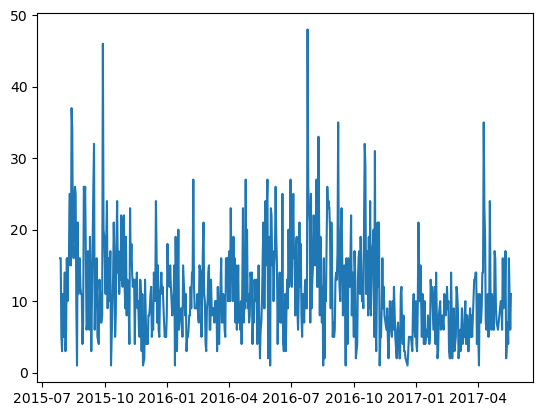

In [463]:
dfEiffelDistr=dfEiffelDate.groupby("date").count().sort("date").toPandas()
plt.plot(dfEiffelDistr["date"], dfEiffelDistr["count"])

